<a href="https://colab.research.google.com/github/Su-edward/LLM_self_learning/blob/main/Machine_Learning/%E7%84%A1%E7%9B%A3%E7%9D%A3%E5%AD%B8%E7%BF%92%E5%B0%88%E6%A1%88%EF%BC%9A%E8%81%9A%E9%A1%9E%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **無監督學習專案：聚類問題（使用K-means算法）**

### **說明：**
此專案不需要標記數據，而是根據數據的內在特徵將數據點分為不同的群組。在這裡，我們使用 Wine 數據集，並使用 K-means 聚類算法，將花的特徵進行自動分類，將相似的花歸為同一群。

### **使用方法：K-means 聚類（K-means Clustering）**

理論：K-means 聚類的理論是最小化每個數據點到所屬群組中心的距離。該算法隨機選擇 K 個中心點（centroids），然後反覆調整這些中心點的位置，直到所有數據點與它們所屬的中心點之間的距離總和最小化。最終結果是數據被分成 K 個聚類。



In [154]:
# Step 1: 安裝必要的庫和工具
!pip install scikit-learn matplotlib
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [182]:
# Step 2: 匯入所需的庫
from sklearn.datasets import load_wine
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video

In [96]:
# Step 3: 加載葡萄酒數據集
wine = load_wine()
X = wine.data  # 特徵數據
y = wine.target  # 實際標籤

In [97]:
# Step 4: 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [104]:
# Step 5: 使用 K-means 進行聚類，設置 K 為 3（因為數據集中有三類）
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [105]:
# Step 6: 比較聚類結果與實際標籤，並計算準確度
df = pd.DataFrame({'Actual': y, 'Predicted': labels})

In [106]:
# 使用自動映射函數對標籤進行匹配
def find_best_mapping(df):
    actual = df['Actual'].values
    predicted = df['Predicted'].values
    unique_labels = np.unique(predicted)
    best_mapping = {}
    best_accuracy = 0

    for perm in np.array(list(itertools.permutations(np.unique(actual)))):
        mapped = [perm[unique_labels.tolist().index(x)] for x in predicted]
        accuracy = accuracy_score(actual, mapped)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_mapping = dict(zip(unique_labels, perm))

    return best_mapping

In [107]:
# Step 7: 將聚類結果映射到實際標籤
mapping_kmeans = find_best_mapping(df)
df['Predicted_mapped'] = df['Predicted'].map(mapping_kmeans)

In [108]:
# Step 8: 計算準確度
accuracy_kmeans = accuracy_score(df['Actual'], df['Predicted_mapped'])
print(f"Accuracy with K-means: {accuracy_kmeans * 100:.2f}%")
print(df.head())

Accuracy with K-means: 96.63%
   Actual  Predicted  Predicted_mapped
0       0          0                 0
1       0          0                 0
2       0          0                 0
3       0          0                 0
4       0          0                 0


In [175]:
# Step 3: 加載葡萄酒數據集並選擇兩個維度
wine = load_wine()
X = wine.data  # 特徵數據
y = wine.target  # 實際標籤

In [176]:
# Step 4: 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [177]:
# 選擇兩個維度（例如前兩個特徵）
X_selected = X_scaled[:, :2]  # 只選擇兩個維度進行可視化

In [178]:
# Step 5: 使用 MiniBatchKMeans 演算法進行部分聚類
kmeans = MiniBatchKMeans(n_clusters=3, init='random', max_iter=10, random_state=42)

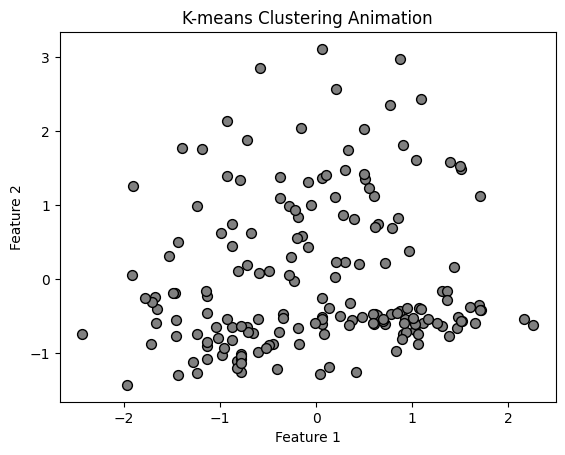

In [192]:
# Step 6: 創建動畫，展示每次迭代的分群過程
fig, ax = plt.subplots()

# 初始化散點圖，所有點都為灰色，並且填充顏色
scatter = ax.scatter(X_selected[:, 0], X_selected[:, 1], c='gray', s=50, edgecolor='black')

# 設置軸標題
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('K-means Clustering Animation')

# 定義顏色映射，用於顯示不同群體的顏色
colors = np.array(['blue', 'green', 'purple'])

In [193]:
# 更新函數，用於更新每一幀
def update(i):
    if i == 0:
        # 第一次更新顯示初始中心點
        kmeans.partial_fit(X_selected)
        centroids = kmeans.cluster_centers_
        centroid_scatter.set_offsets(centroids)
        return centroid_scatter,

    elif i <= len(X_selected):
        # 按順序進行分群，一次處理一個數據點
        labels = kmeans.predict(X_selected[:i])  # 逐步分配點到最近的聚類中心
        colors_for_points = np.concatenate([colors[labels], np.full(len(X_selected) - i, 'gray')])  # 未分群的點仍然為灰色
        scatter.set_facecolor(colors_for_points)  # 更新顏色並填充點
        return scatter,

    else:
        # 完成所有點分配後，更新最終的中心
        labels = kmeans.predict(X_selected)
        scatter.set_facecolor(colors[labels])  # 使用分群後的顏色並填充
        centroids = kmeans.cluster_centers_
        centroid_scatter.set_offsets(centroids)
        return scatter, centroid_scatter

In [194]:
# 顯示初始聚類中心
centroids = np.zeros((3, 2))  # 初始化為零，之後會被更新
centroid_scatter = ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)

In [196]:
# 創建動畫，每次逐步更新
ani = FuncAnimation(fig, update, frames=range(len(X_selected) + 10), interval=500, repeat=False)

# 保存動畫為 mp4 文件
ani.save('/content/kmeans_animation_filled.mp4', writer='ffmpeg')

# Step 7: 顯示生成的 mp4 文件
Video('/content/kmeans_animation_filled.mp4')